In [1]:
# Problem Definition:
# The objective of this regression task is to predict the salary of an individual based on their years of experience.

# Identifying the dependent and independent variables:
# Dependent variable (target): Salary
# Independent variable (feature): YearsExperience

In [2]:
import pandas as pd

# Define the data source
data_source = 'Salary_dataset.csv'  # Path to the dataset

# Load the dataset into the program
salary_data = pd.read_csv(data_source)  # Read the CSV file into a DataFrame

In [3]:
# View dataset summary
print("Dataset Head:")
print(salary_data.head())  # Show the first few rows again for reference

print("\nDataset Tail:")
print(salary_data.tail())  # Show the last few rows of the dataset

print("\nDataset Info:")
print(salary_data.info())  # Show the dataset's structure and types

# Check for missing or null values
print("\nMissing Values:")
print(salary_data.isnull().sum())  # Count and display missing values in each column

# Analyze descriptive statistics
print("\nDescriptive Statistics:")
print(salary_data.describe())  # Display summary statistics for numerical columns


Dataset Head:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Dataset Tail:
    Unnamed: 0  YearsExperience    Salary
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None

Missing Values:
Unnamed: 0         0
YearsExperience    0
Salary       

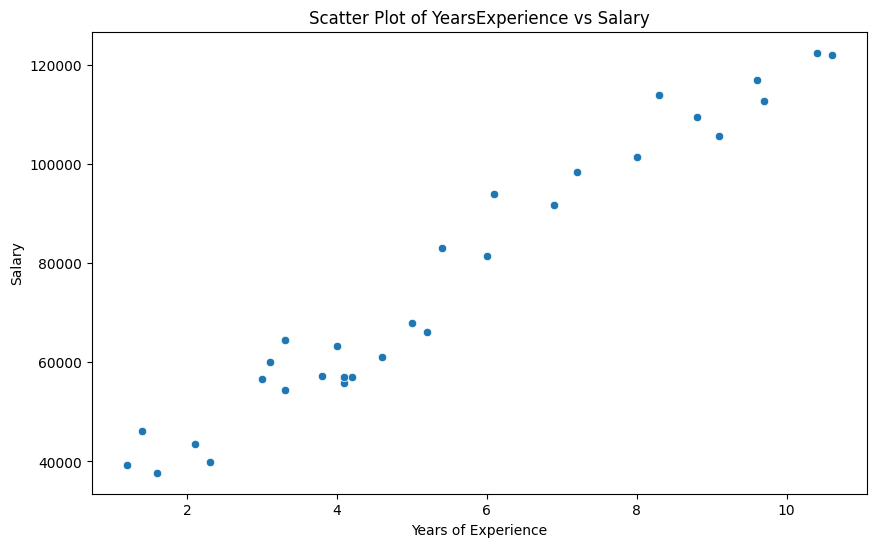

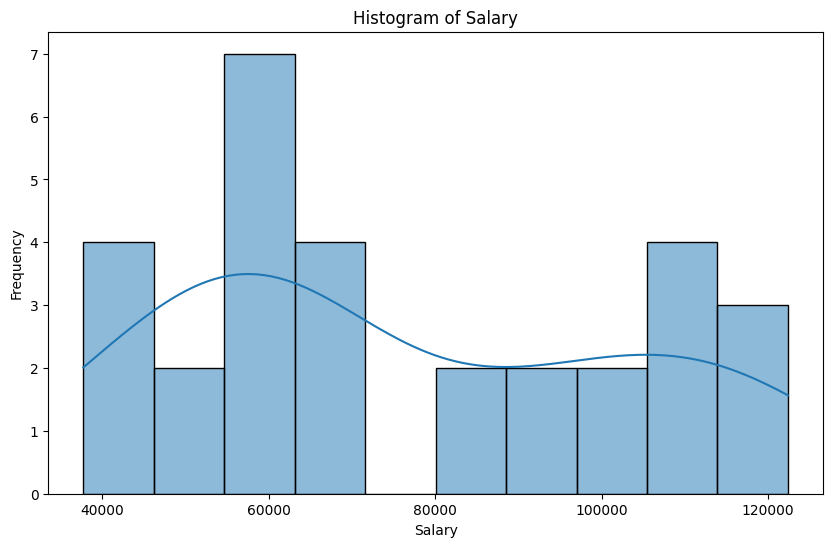

In [4]:
# Visualize relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for YearsExperience vs Salary
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.scatterplot(data=salary_data, x='YearsExperience', y='Salary')  # Create a scatter plot
plt.title('Scatter Plot of YearsExperience vs Salary')  # Title of the plot
plt.xlabel('Years of Experience')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.show()  # Display the plot

# Histogram of Salary
plt.figure(figsize=(10, 6))  # Set the figure size for the histogram
sns.histplot(salary_data['Salary'], bins=10, kde=True)  # Create a histogram with KDE
plt.title('Histogram of Salary')  # Title of the histogram
plt.xlabel('Salary')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the histogram

In [5]:
# Handle missing values by dropping rows with any missing values
salary_data = salary_data.dropna()  # Remove rows with missing values

# Encode categorical variables (if any) - In this case, there are no categorical variables to encode


In [6]:
# Normalize or scale numerical data - Using MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Initialize the MinMaxScaler
salary_data[['YearsExperience', 'Salary']] = scaler.fit_transform(salary_data[['YearsExperience', 'Salary']])  # Scale the features

# Split data into features and target variable
X = salary_data[['YearsExperience']]  # Features (independent variable)
y = salary_data['Salary']  # Target variable (dependent variable)


In [7]:
from sklearn.model_selection import train_test_split

# Define the train-test split ratio
test_size = 0.2  # 20% of the data will be used for testing

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)  # Split the data


In [8]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()  # Initialize the linear regression model

# Fit the model to the training data
linear_model.fit(X_train, y_train)  # Train the model using the training data

# Since the model has already been fitted to the training data, we can optimize the model parameters.
# However, for a simple linear regression model, there are no hyperparameters to optimize.
# We can evaluate the model's performance using metrics like R^2 score and Mean Squared Error (MSE).


LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training set
y_train_pred = linear_model.predict(X_train)  # Predict salary for training data

# Calculate Mean Squared Error and R^2 score
mae_train = mean_absolute_error(y_train, y_train_pred)  # Calculate Mean Absolute Error
mse_train = mean_squared_error(y_train, y_train_pred)  # Calculate Mean Squared Error
rmse_train = np.sqrt(mse_train)  # Calculate Root Mean Squared Error
r2_train = r2_score(y_train, y_train_pred)  # Calculate R^2 score

print(f'Training Mean Absolute Error: {mae_train}')  # Output MAE for training set
print(f'Training Mean Squared Error: {mse_train}')  # Output MSE for training set
print(f'Training Root Mean Squared Error: {rmse_train}')  # Output RMSE for training set
print(f'Training R^2 Score: {r2_train}')  # Output R^2 score for training set

# Interpreted statements based on MAE, RMSE, and R^2
print("\nInterpretation:")
print(f"The Mean Absolute Error (MAE) of {mae_train:.2f} indicates the average error in salary predictions is about {mae_train:.2f} units.")
print(f"The Root Mean Squared Error (RMSE) of {rmse_train:.2f} suggests that the model's predictions deviate from the actual values by approximately {rmse_train:.2f} units on average.")
print(f"The R^2 Score of {r2_train:.2f} implies that the model explains {r2_train:.2%} of the variance in the salary data, indicating a good fit.")


Training Mean Absolute Error: 0.04985880858079062
Training Mean Squared Error: 0.003781366866454345
Training Root Mean Squared Error: 0.061492819633306335
Training R^2 Score: 0.9645401573418148

Interpretation:
The Mean Absolute Error (MAE) of 0.05 indicates the average error in salary predictions is about 0.05 units.
The Root Mean Squared Error (RMSE) of 0.06 suggests that the model's predictions deviate from the actual values by approximately 0.06 units on average.
The R^2 Score of 0.96 implies that the model explains 96.45% of the variance in the salary data, indicating a good fit.


In [10]:
# Now, let's also evaluate the model on the test set
y_test_pred = linear_model.predict(X_test)  # Predict salary for test data

# Calculate Mean Squared Error and R^2 score for the test set
mse_test = mean_squared_error(y_test, y_test_pred)  # Calculate MSE for test set
rmse_test = np.sqrt(mse_test)  # Calculate RMSE for test set
r2_test = r2_score(y_test, y_test_pred)  # Calculate R^2 score for test set

print(f'Test Mean Squared Error: {mse_test}')  # Output MSE for test set
print(f'Test Root Mean Squared Error: {rmse_test}')  # Output RMSE for test set
print(f'Test R^2 Score: {r2_test}')  # Output R^2 score for test set

# Interpreted statements based on MAE, RMSE, and R^2 for the test set
print("\nInterpretation:")
print(f"The Mean Squared Error (MSE) of {mse_test:.2f} indicates the average squared error in salary predictions on the test set.")
print(f"The Root Mean Squared Error (RMSE) of {rmse_test:.2f} suggests that the model's predictions deviate from the actual values by approximately {rmse_test:.2f} units on average.")
print(f"The R^2 Score of {r2_test:.2f} implies that the model explains {r2_test:.2%} of the variance in the salary data for the test set, indicating a good fit.")


Test Mean Squared Error: 0.006952407238200631
Test Root Mean Squared Error: 0.08338109640800265
Test R^2 Score: 0.9024461774180499

Interpretation:
The Mean Squared Error (MSE) of 0.01 indicates the average squared error in salary predictions on the test set.
The Root Mean Squared Error (RMSE) of 0.08 suggests that the model's predictions deviate from the actual values by approximately 0.08 units on average.
The R^2 Score of 0.90 implies that the model explains 90.24% of the variance in the salary data for the test set, indicating a good fit.


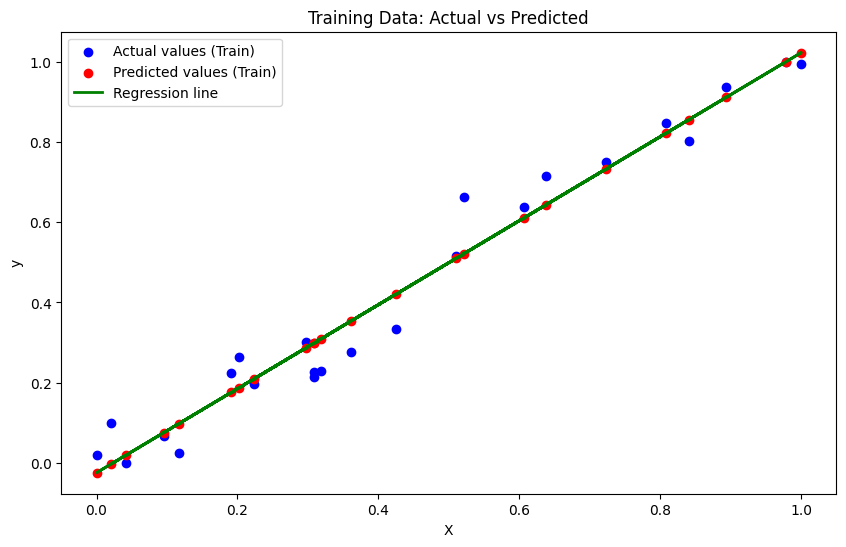

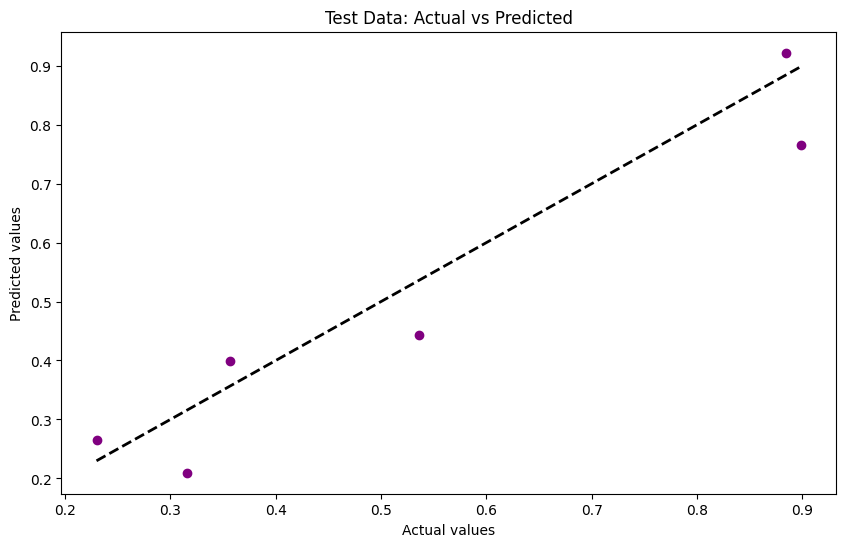

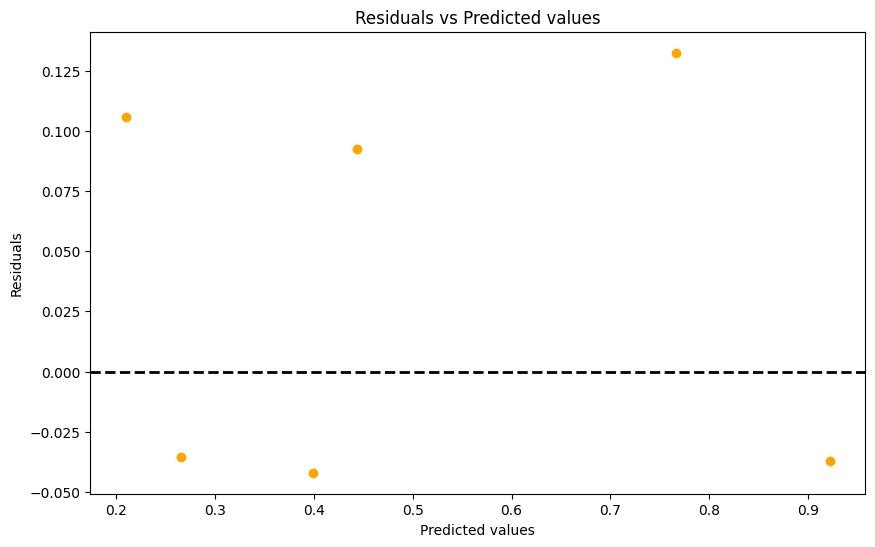

In [11]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.scatter(X_train, y_train, color='blue', label='Actual values (Train)')  # Plot actual training values
plt.scatter(X_train, y_train_pred, color='red', label='Predicted values (Train)')  # Plot predicted training values
plt.plot(X_train, linear_model.predict(X_train), color='green', linewidth=2, label='Regression line')  # Plot regression line
plt.title('Training Data: Actual vs Predicted')  # Title of the plot
plt.xlabel('X')  # X-axis label
plt.ylabel('y')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

# Compare predicted vs actual values
plt.figure(figsize=(10, 6))  # Set the figure size for the comparison plot
plt.scatter(y_test, y_test_pred, color='purple')  # Plot predicted vs actual values for test set
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Test Data: Actual vs Predicted')  # Title of the plot
plt.xlabel('Actual values')  # X-axis label
plt.ylabel('Predicted values')  # Y-axis label
plt.show()  # Display the plot

# Visualize residuals
residuals = y_test - y_test_pred  # Calculate residuals (errors)
plt.figure(figsize=(10, 6))  # Set the figure size for the residuals plot
plt.scatter(y_test_pred, residuals, color='orange')  # Plot residuals vs predicted values
plt.axhline(0, color='black', lw=2, linestyle='--')  # Horizontal line at zero for reference
plt.title('Residuals vs Predicted values')  # Title of the plot
plt.xlabel('Predicted values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.show()  # Display the plot


In [12]:
import joblib

# Save the trained model to a file
joblib.dump(linear_model, 'salary_prediction_model.pkl')  # Save the model for future use

['salary_prediction_model.pkl']